<a href="https://colab.research.google.com/github/Kiarro21/DataCleaning/blob/main/ParsingDates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

data = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv")

np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


In [28]:
print(data['Date'].head())

0    2009-09-10
1    2009-09-10
2    2009-09-10
3    2009-09-10
4    2009-09-10
Name: Date, dtype: object


In [29]:
data['Date'].dtype

dtype('O')

In [33]:
data['date_parsed'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [34]:
data['date_parsed'].head()

0   2009-09-10
1   2009-09-10
2   2009-09-10
3   2009-09-10
4   2009-09-10
Name: date_parsed, dtype: datetime64[ns]

In [39]:
day_of_month_data = data['date_parsed'].dt.day
day_of_month_data.head()

0    10
1    10
2    10
3    10
4    10
Name: date_parsed, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


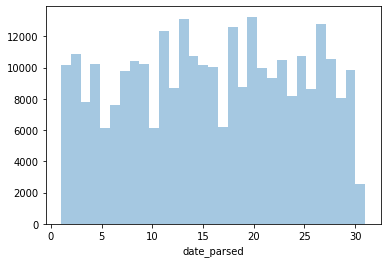

In [40]:
day_of_month_data = day_of_month_data.dropna()

sns.distplot(day_of_month_data, kde=False, bins=31)